In [11]:
import numpy as np
import pandas as pd
from accdb_reading import get_measure_df
from measurement_collector import MeasurementCollector
from tqdm import tqdm
from random import random

import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = [15, 15]
 
_db_path = "/home/levcsi/projects/stroke_prediction/data/WUS-v4meresek 20220202.accdb"
_m_path = "/home/levcsi/projects/stroke_prediction/data/biocal.xlsx"
mc = MeasurementCollector('/home/levcsi/projects/stroke_prediction/data', _db_path, _m_path,
                         synchronizing=True)

202110230 is not found in aux data
202110230 measurement_path_dict is OK
202110251 measurement_path_dict is OK
202110280 measurement_path_dict is OK
202111021 measurement_path_dict is OK
202111041 measurement_path_dict is OK
202111141 measurement_path_dict is OK
202111181 measurement_path_dict is OK
202112020 measurement_path_dict is OK
202112131 measurement_path_dict is OK
202112171 measurement_path_dict is OK
202201061 measurement_path_dict is OK
202201191 measurement_path_dict is OK
202201310 measurement_path_dict is OK
Number of measurements 13
Number of 0: 4 (30.77 %)
Number of 1: 0 (0.00 %)
Number of 2: 4 (30.77 %)
Number of 3: 0 (0.00 %)
Number of 4: 1 (7.69 %)
Number of 5: 4 (30.77 %)


In [ ]:
all_meas_dict = mc.get_all_valid_measurement_df()

In [4]:
all_meas_dict.keys()

dict_keys(['1023ap109', '1meresjenei'])

In [5]:
all_meas_dict['1meresjenei'].keys()

dict_keys([('left', 'arm', 'acc'), ('left', 'arm', 'gyr'), ('left', 'leg', 'acc'), ('left', 'leg', 'gyr'), ('right', 'arm', 'acc'), ('right', 'arm', 'gyr'), ('right', 'leg', 'acc'), ('right', 'leg', 'gyr')])

In [7]:
all_acc_diff_dict = mc.get_all_acc_diff_df()

In [12]:
np.abs(all_acc_diff_dict['1meresjenei'][('left', 'arm', 'acc')]).mean()

0.008123155424505975

In [3]:
mean_list = list()
class_value_list = list()
limb_list = list()

limb_dict = {"arm": 1, "leg": 2}

for meas_name, meas in mc.measurement_dict.items():
    if meas.valid:
        for key in meas.measurement_dict.keys():
            if key[2] == "acc":
                mean_list.append(meas.get_diff(key).mean())
                class_value_list.append(meas.get_class_value(key[:2]))
                limb_list.append(limb_dict[key[1]])

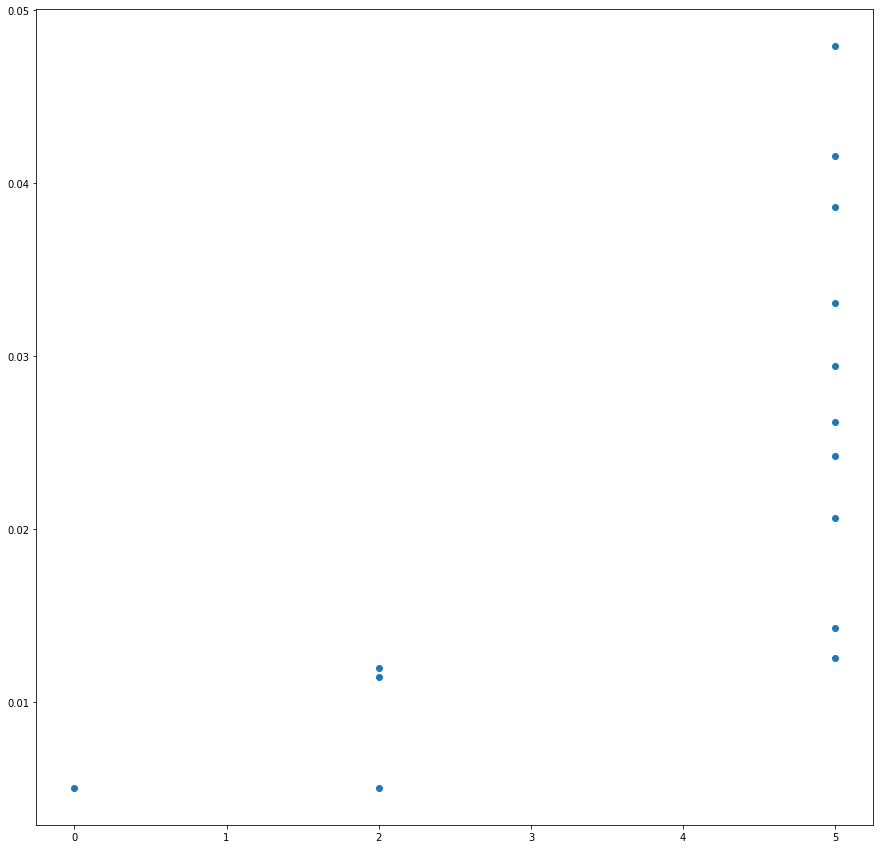

In [4]:
plt.scatter([class_value_list[i] for i in range(len(limb_list)) if limb_list[i] == 1],
            [mean_list[i] for i in range(len(limb_list)) if limb_list[i] == 1])

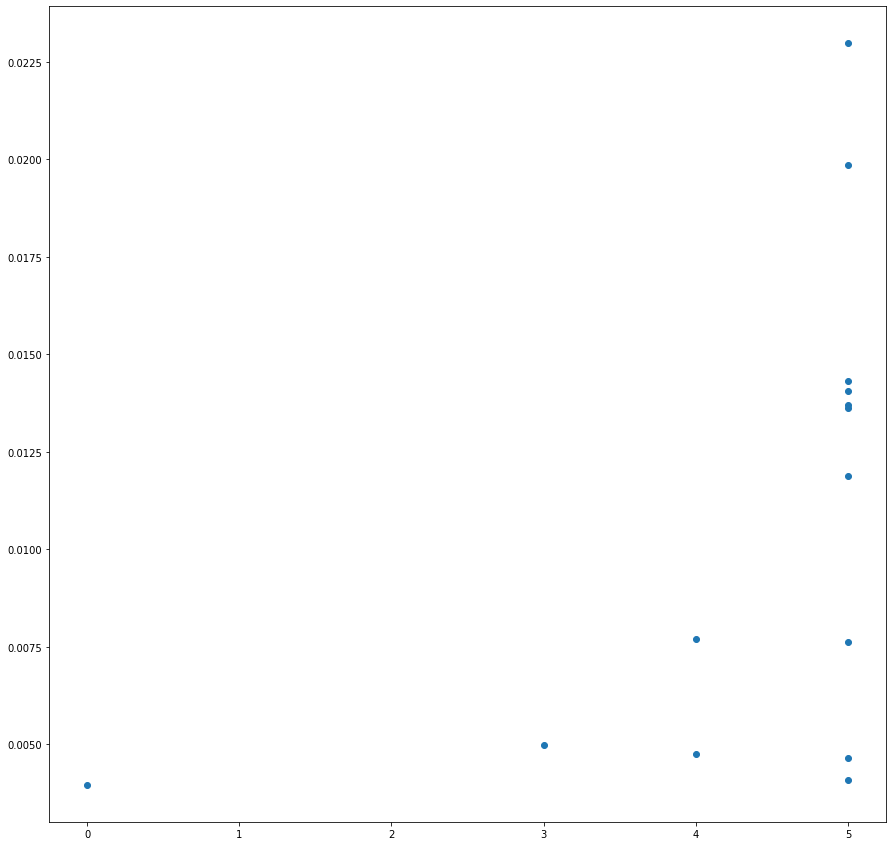

In [5]:
plt.scatter([class_value_list[i] for i in range(len(limb_list)) if limb_list[i] == 2],
            [mean_list[i] for i in range(len(limb_list)) if limb_list[i] == 2])

## More measurement diff

In [11]:
mean_list = list()
class_value_list = list()
limb_list = list()

limb_dict = {"arm": 1, "leg": 2}

for _ in tqdm(range(250)):
    random_diff, class_value, key = mc.get_random_diff_with_class(length=25 * 60 * 60 * 2)
    mean_list.append(np.abs(random_diff).mean())
    class_value_list.append(class_value + random() / 10)
    limb_list.append(limb_dict[key[1]])


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 250/250 [04:51<00:00,  1.17s/it]


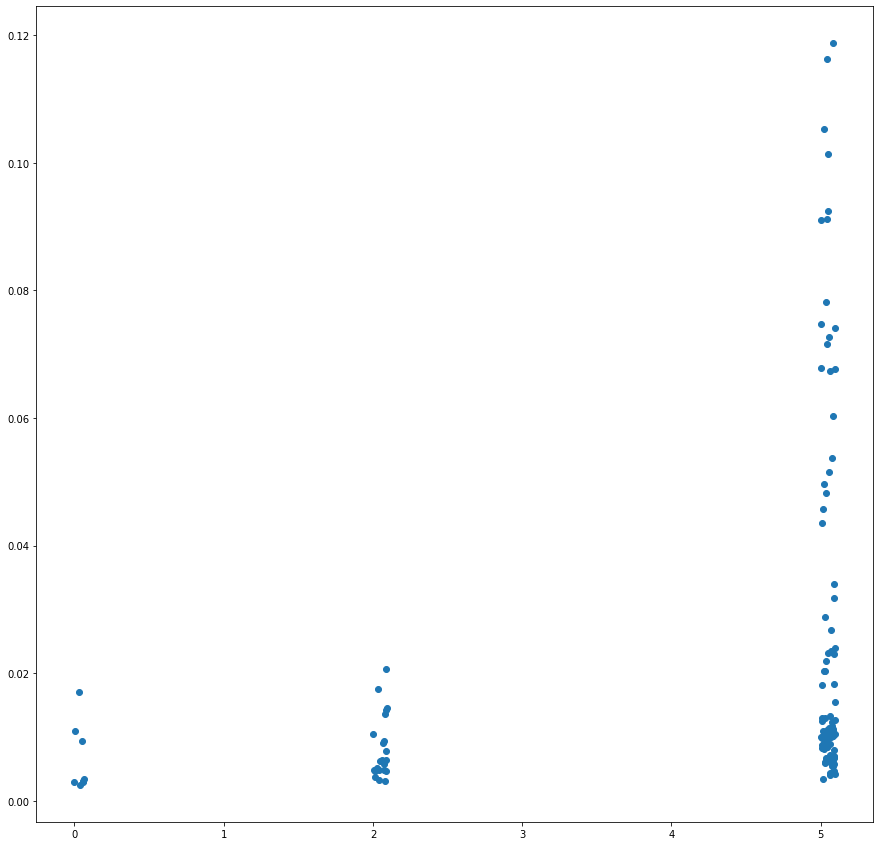

In [12]:
plt.scatter([class_value_list[i] for i in range(len(limb_list)) if limb_list[i] == 1],
            [mean_list[i] for i in range(len(limb_list)) if limb_list[i] == 1])

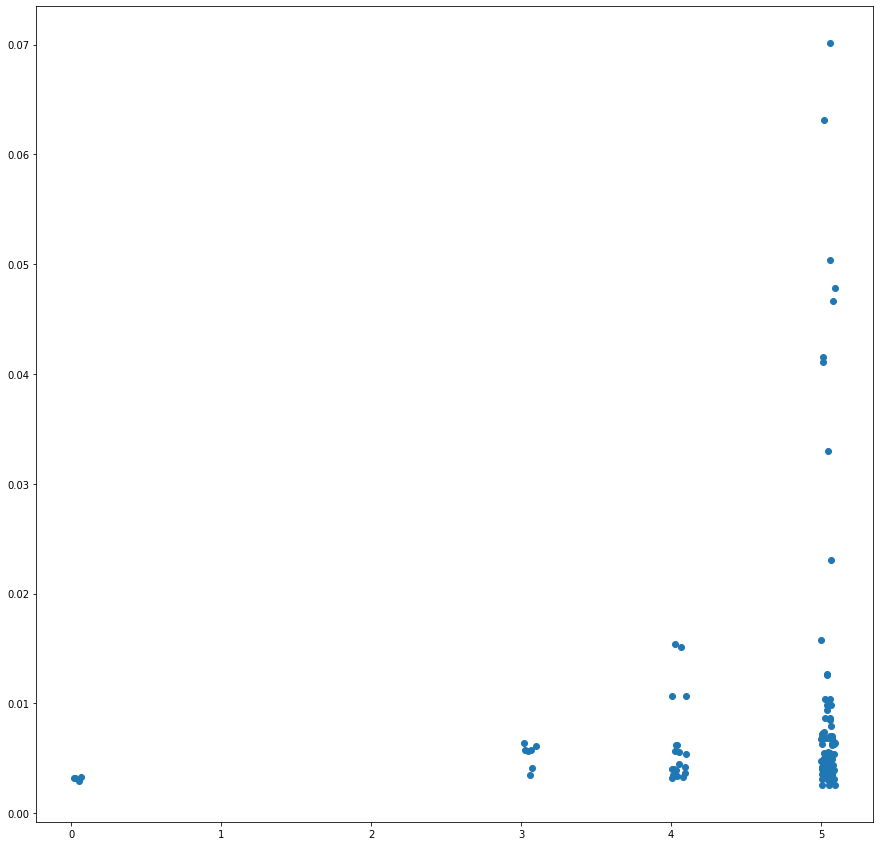

In [13]:
plt.scatter([class_value_list[i] for i in range(len(limb_list)) if limb_list[i] == 2],
            [mean_list[i] for i in range(len(limb_list)) if limb_list[i] == 2])

## More measurement limb diff

In [3]:
result_list = list()

limb_dict = {"arm": 1, "leg": 2}
meas_type_dict = {"acc": 1, "gyr": 2}
num_sample = 50
time_length = 25 * 60 * 60 * 2

for limb in limb_dict.keys():
    for meas_type in meas_type_dict.keys():
        for _ in tqdm(range(num_sample), limb + " " + meas_type):
            random_limb_diff_mean, class_value = mc.get_random_limb_diff_mean_with_class(limb, meas_type, time_length)      
            result_list.append([random_limb_diff_mean, class_value + random() / 10, limb, meas_type])

leg gyr: 100%|███████████████████████████████████████████████████████| 50/50 [00:19<00:00,  2.57it/s]


arm acc


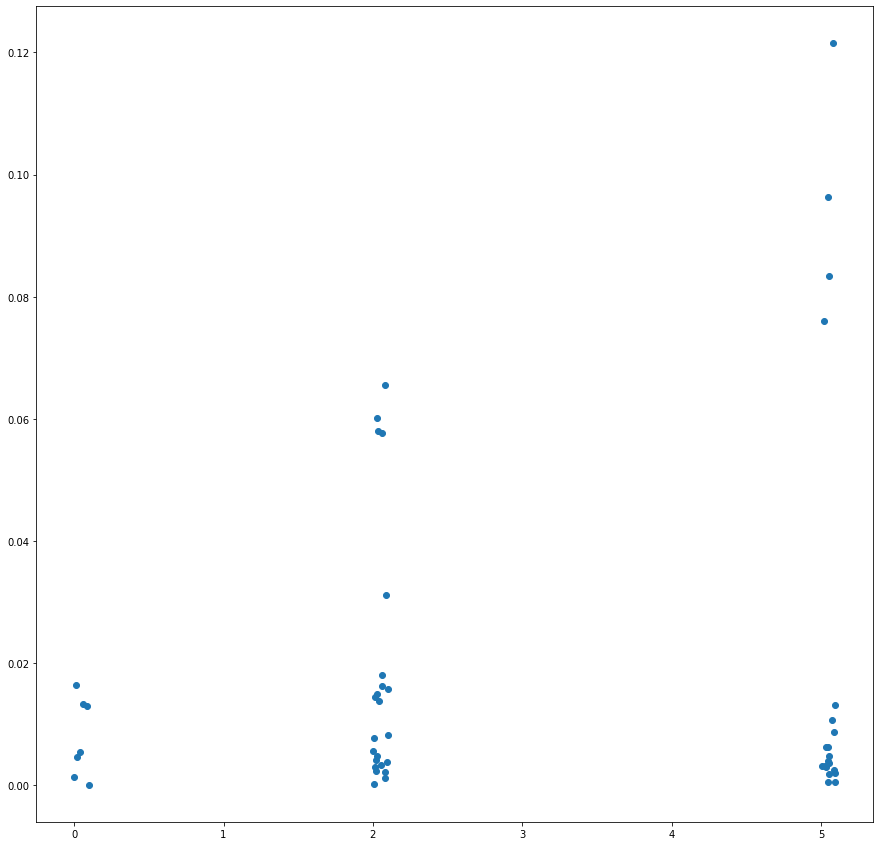

arm gyr


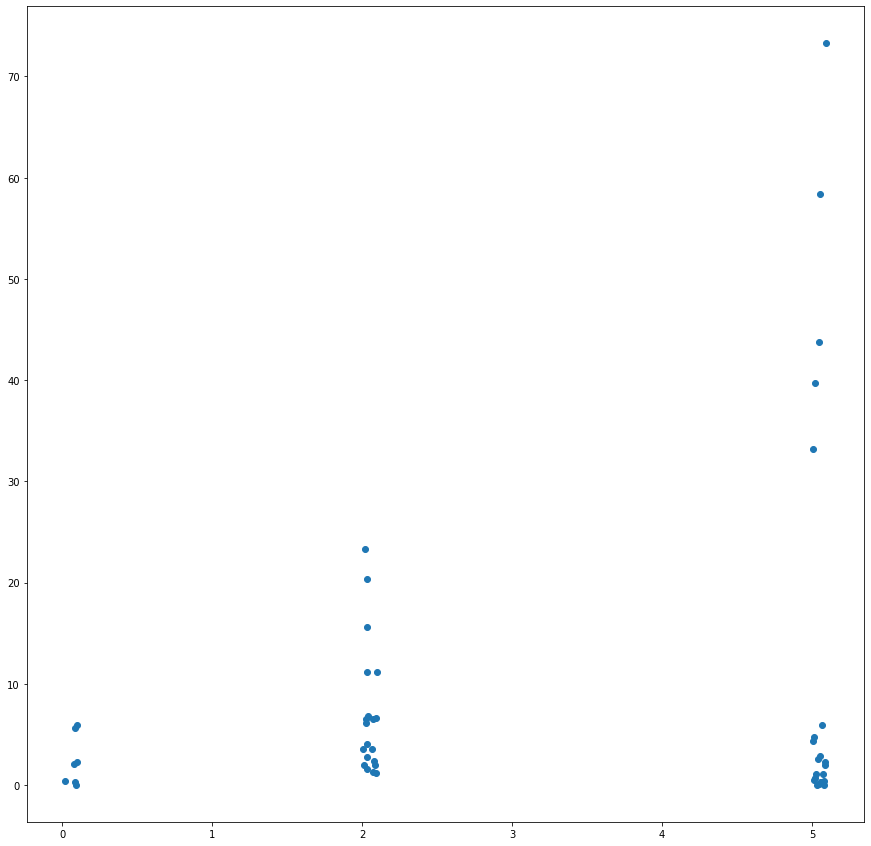

leg acc


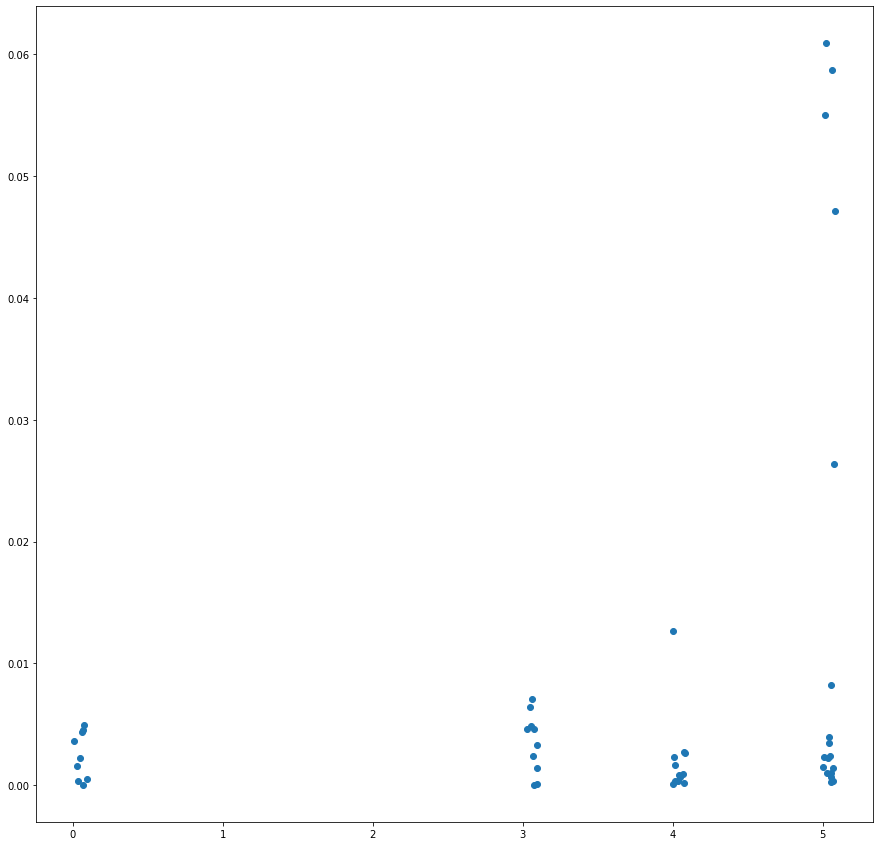

leg gyr


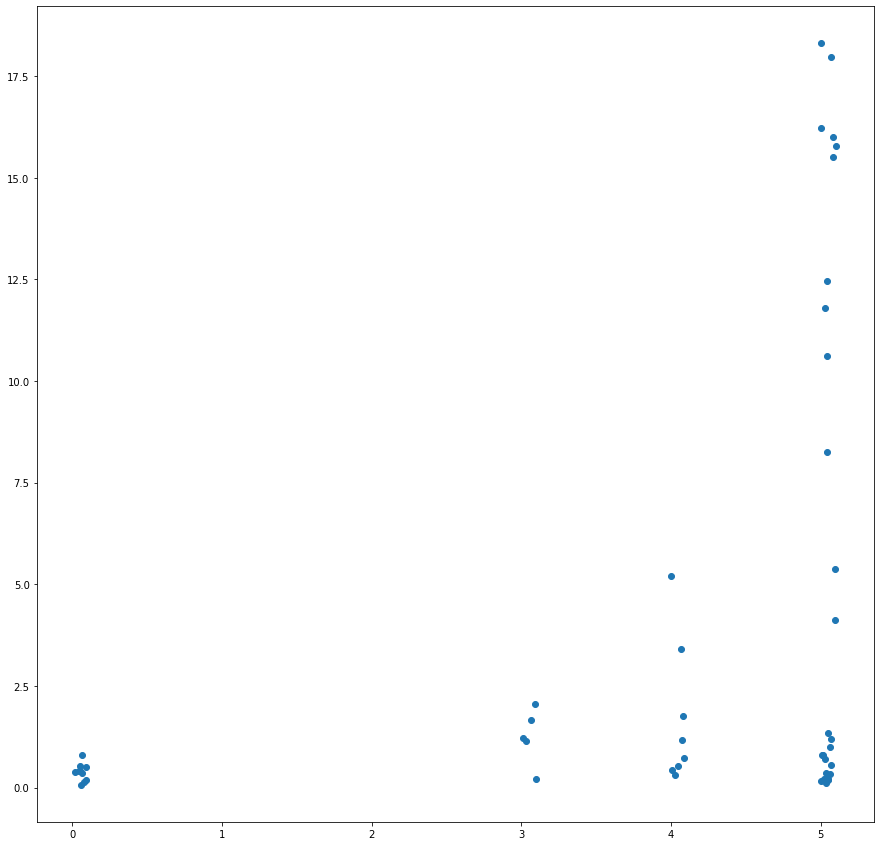

In [15]:
for limb in limb_dict.keys():
    for meas_type in meas_type_dict.keys():
        print(limb, meas_type)
        #y = [result[0] for result in result_list if result[3] == meas_type and result[2] == limb]
        #x = [result[1] for result in result_list if result[3] == meas_type and result[2] == limb]
        #print(len(x), len(y))
        #print(y)
        #plt.scatter(x, y)
        plt.scatter([result[1] for result in result_list if result[3] == meas_type and result[2] == limb and result[0][1]],
                    [result[0][0] for result in result_list if result[3] == meas_type and result[2] == limb and result[0][1]])
        plt.grid()
        plt.show()

## Sweep

5
arm


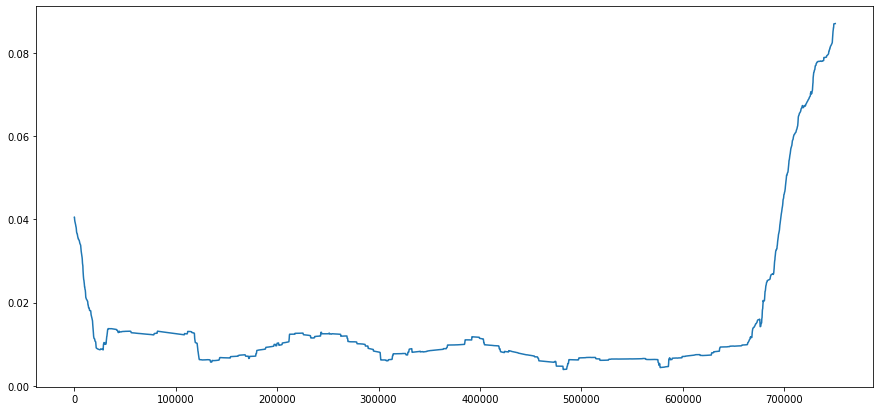

5
leg


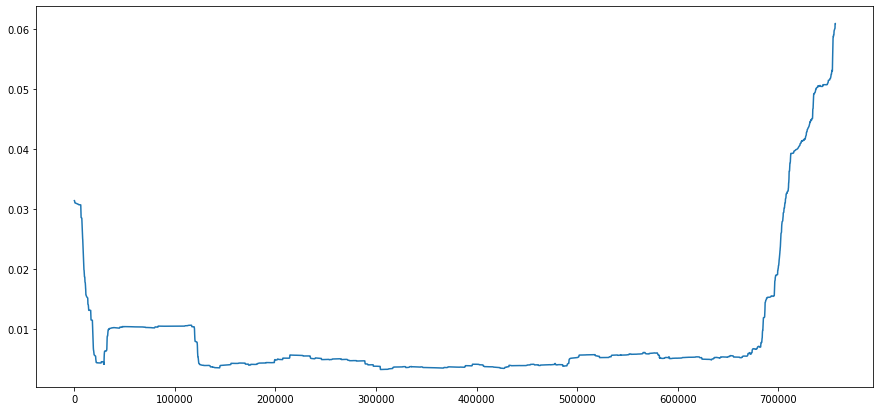

5
arm


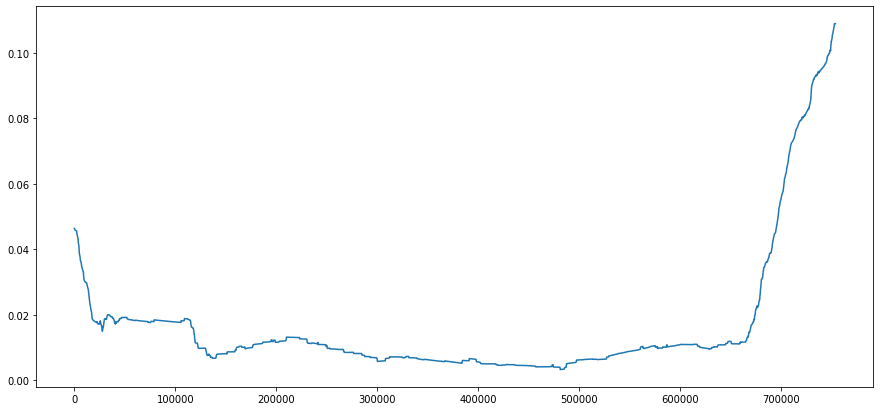

5
leg


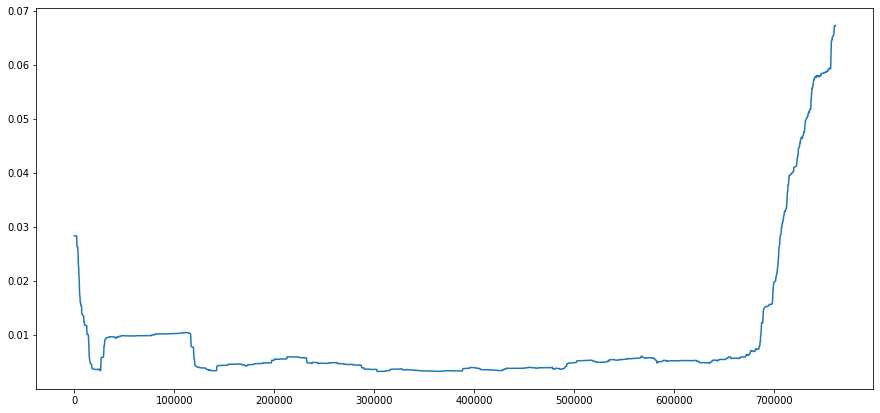

2
arm


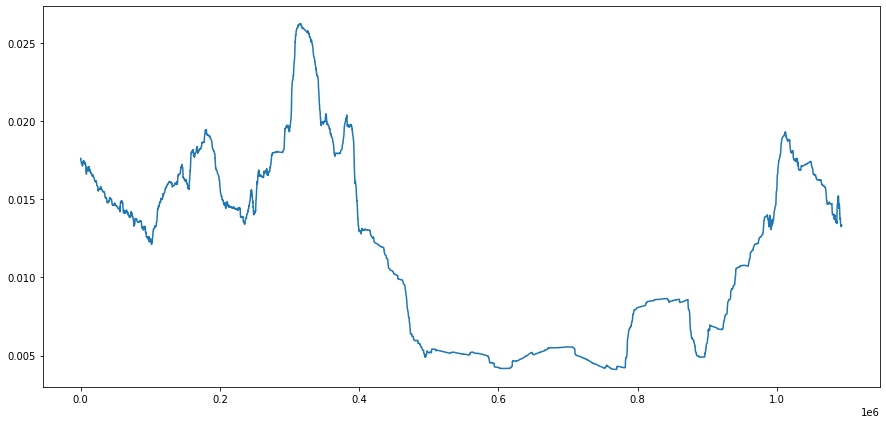

3
leg


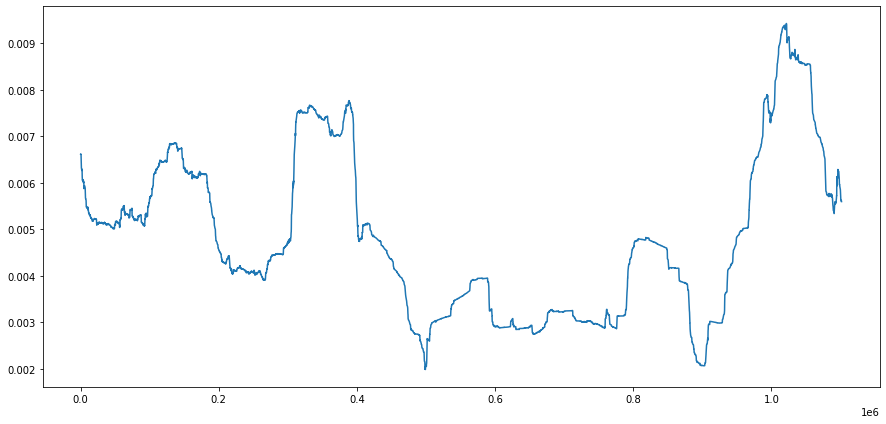

5
arm


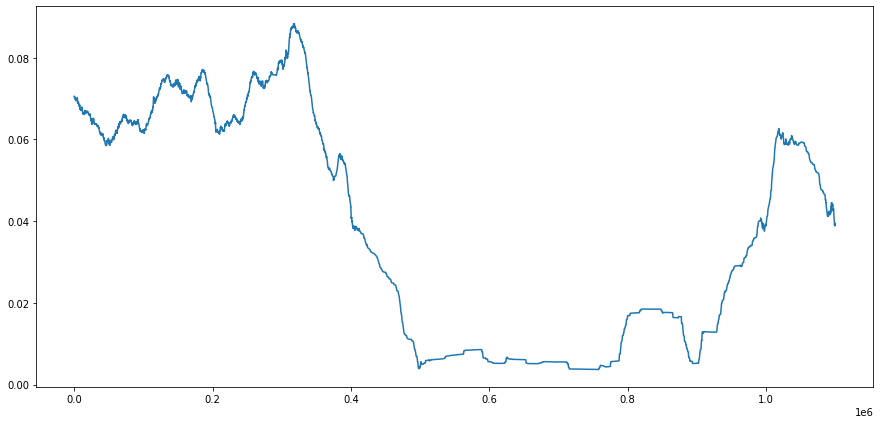

5
leg


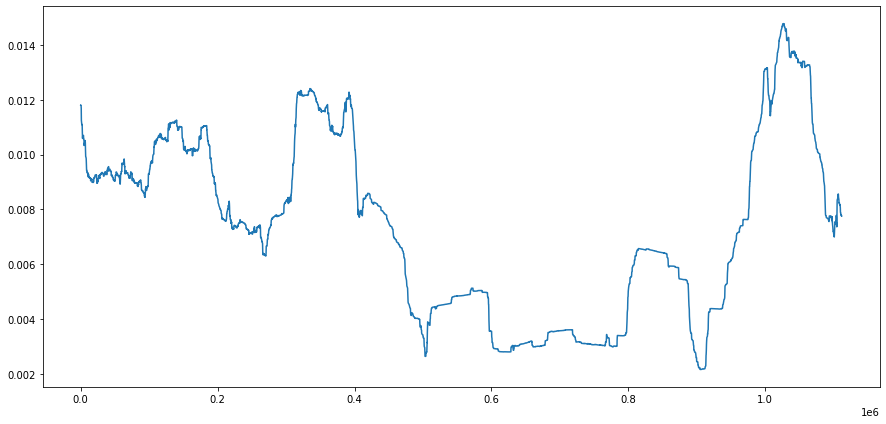

5
arm


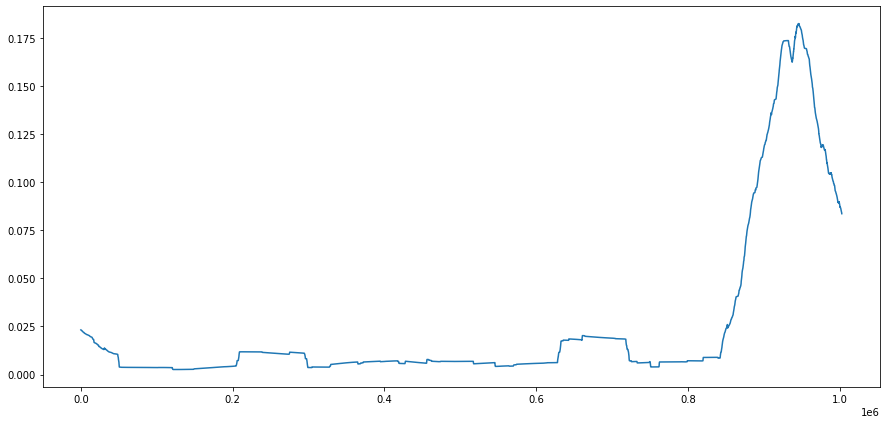

5
leg


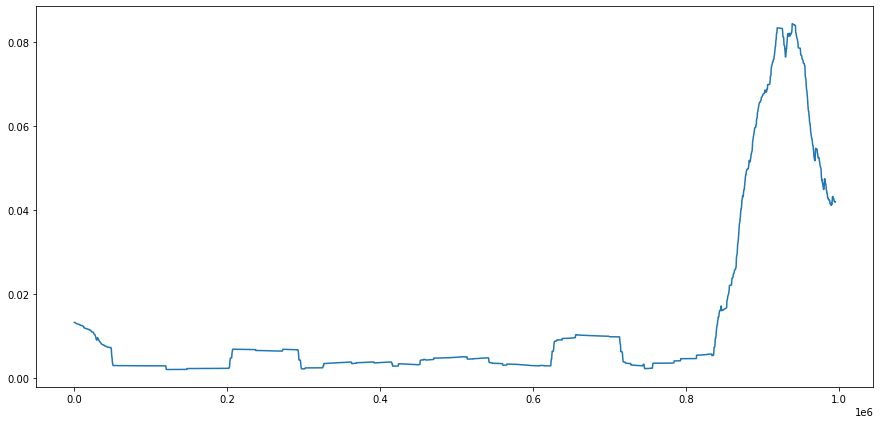

5
arm


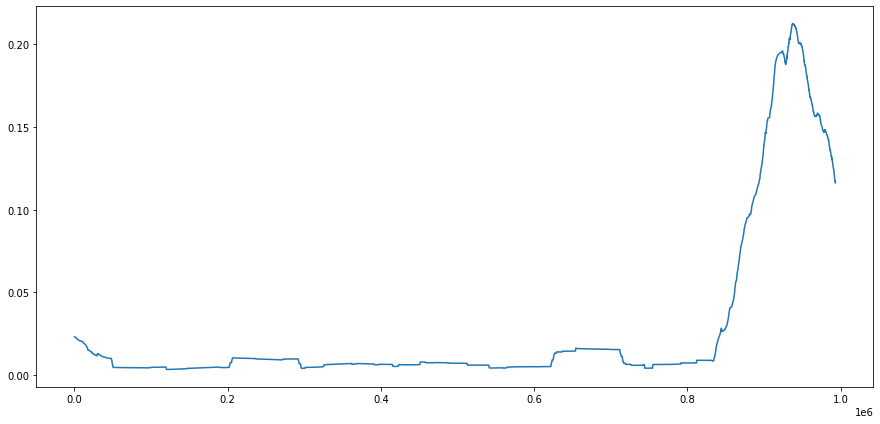

5
leg


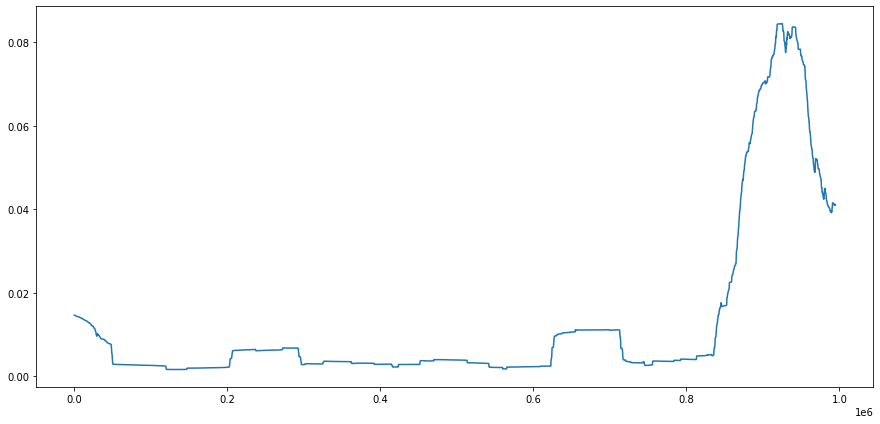

0
arm


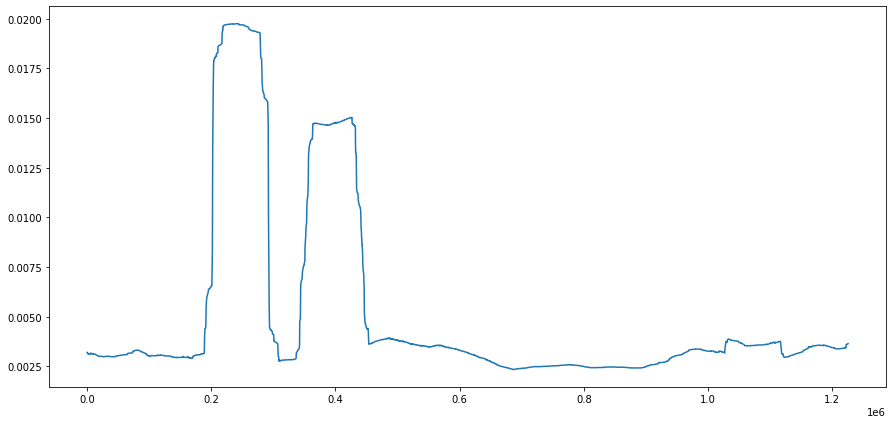

0
leg


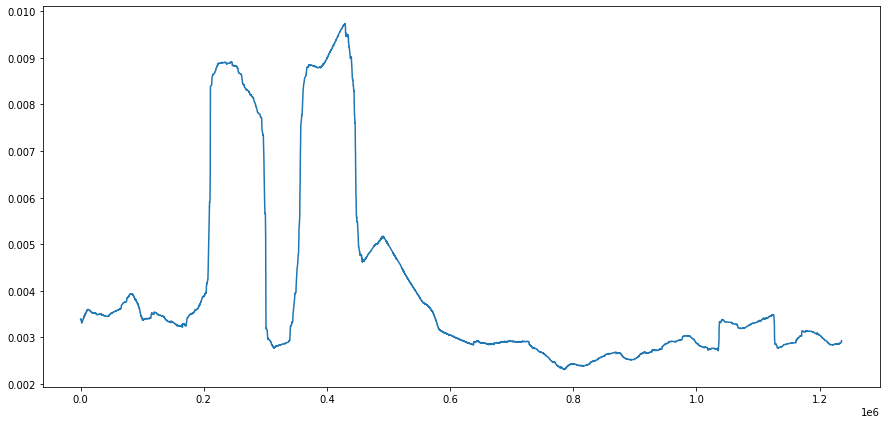

5
arm


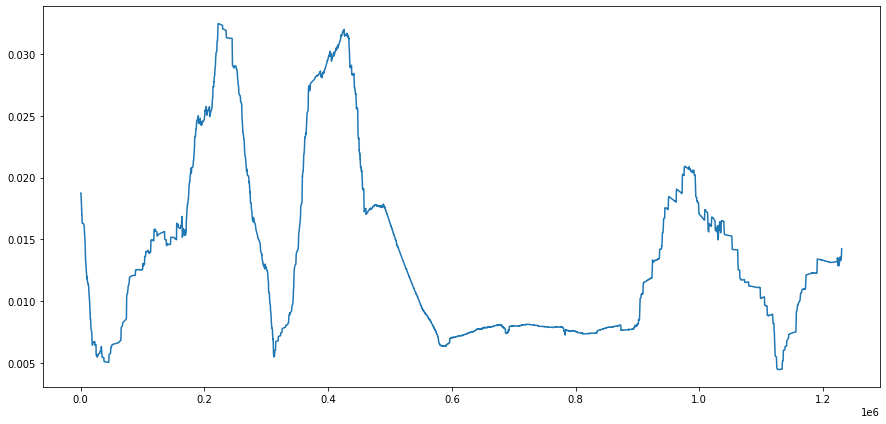

5
leg


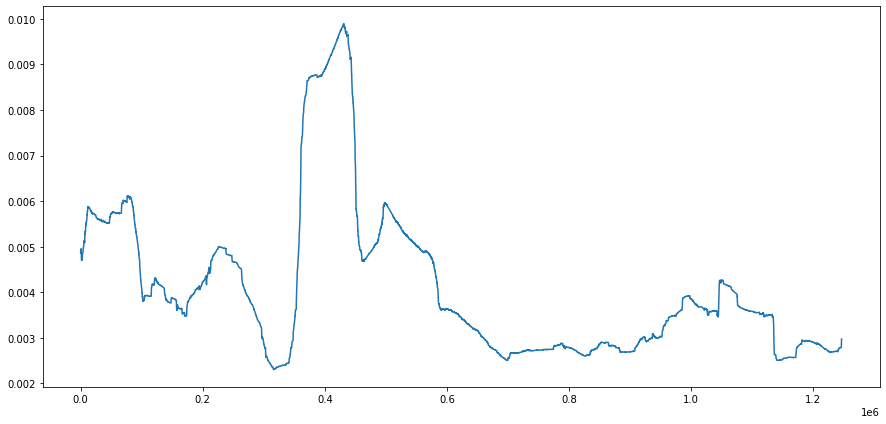

5
arm


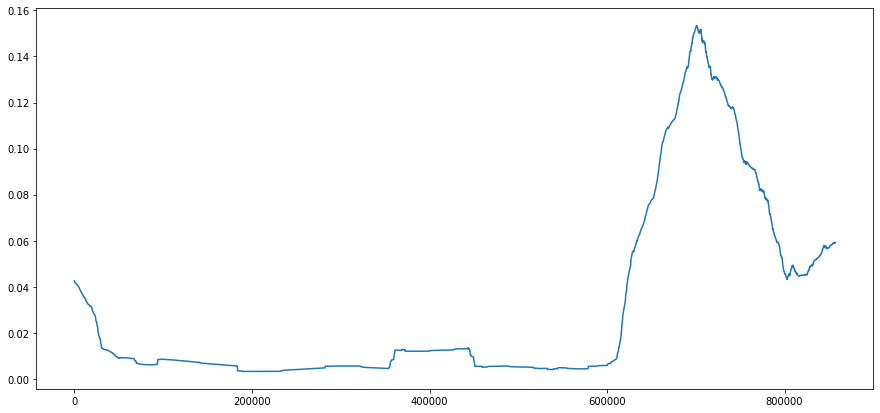

5
leg


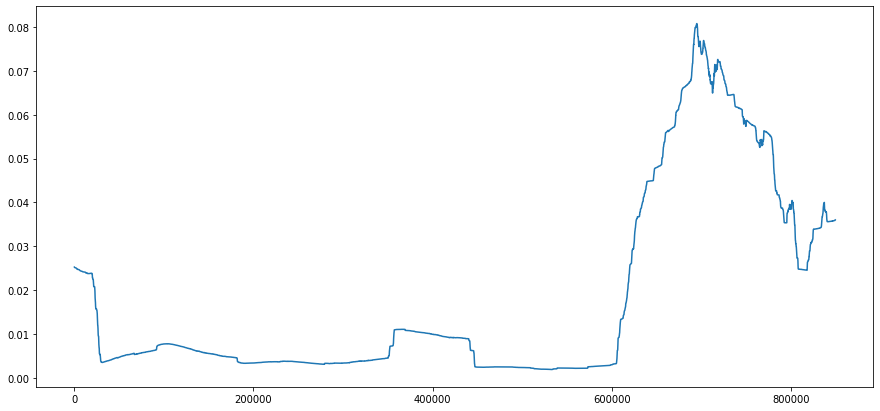

5
arm


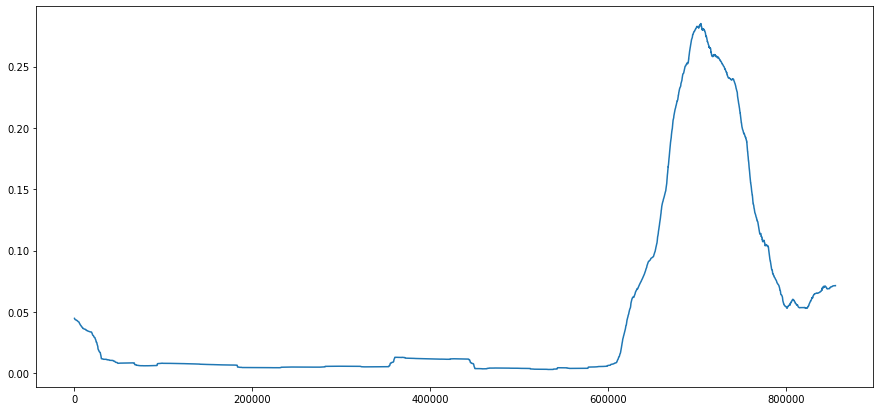

5
leg


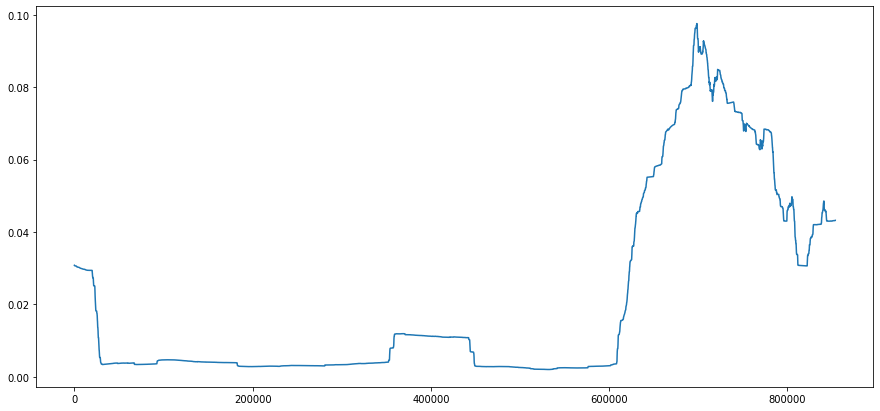

2
arm


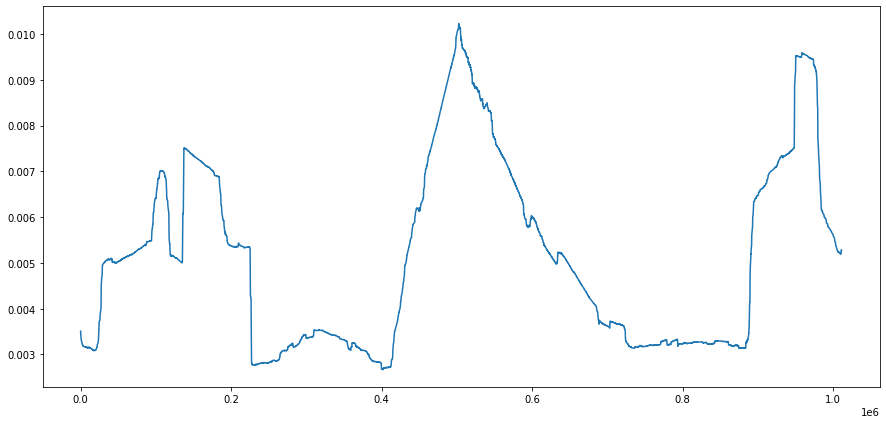

4
leg


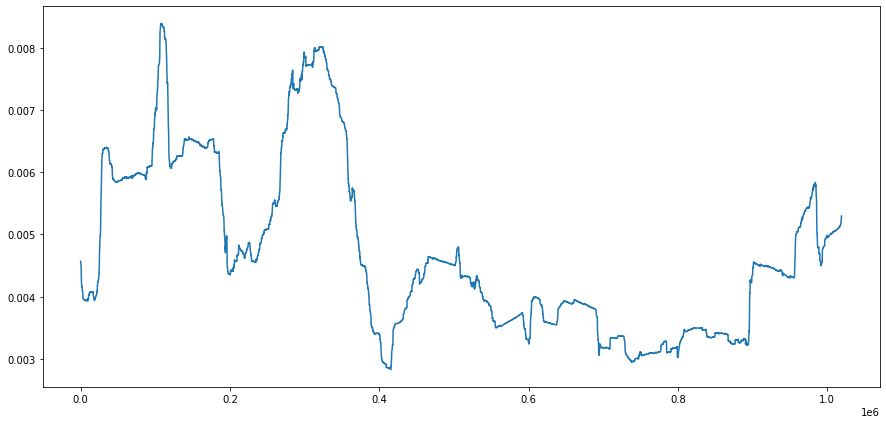

5
arm


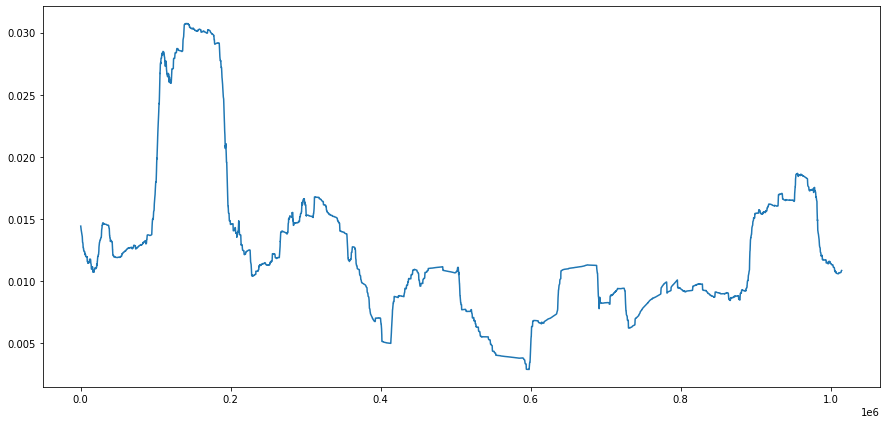

5
leg


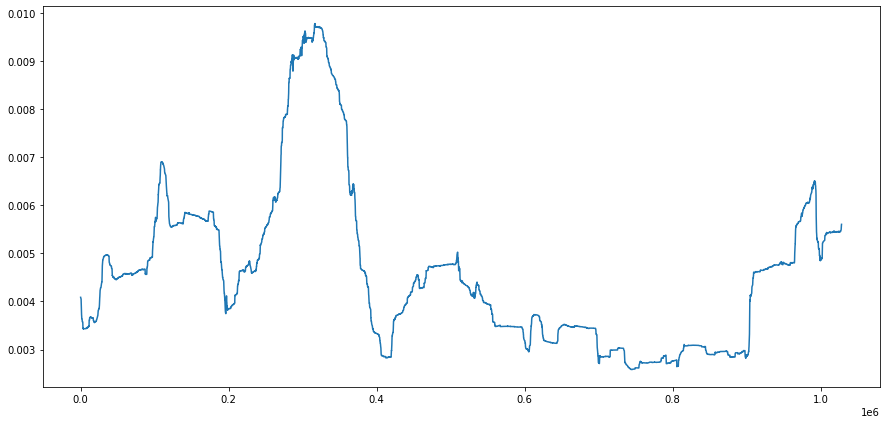

5
arm


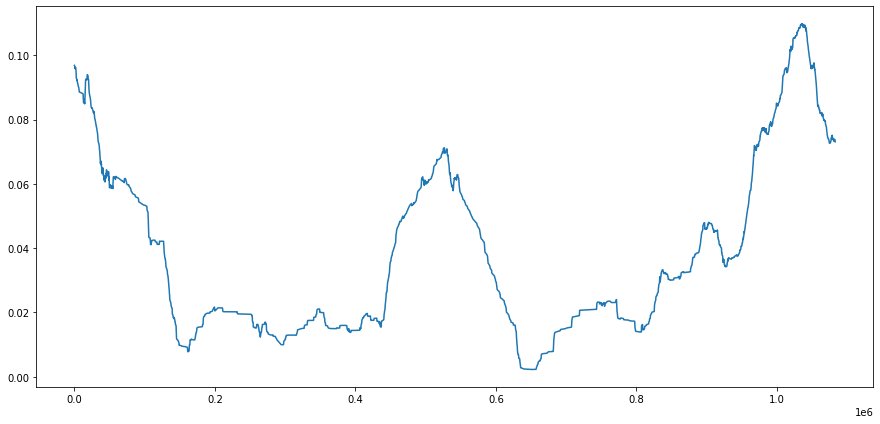

5
leg


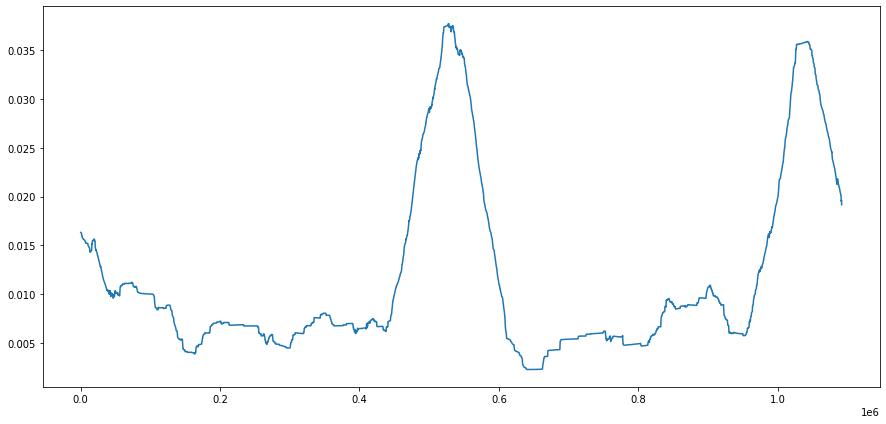

2
arm


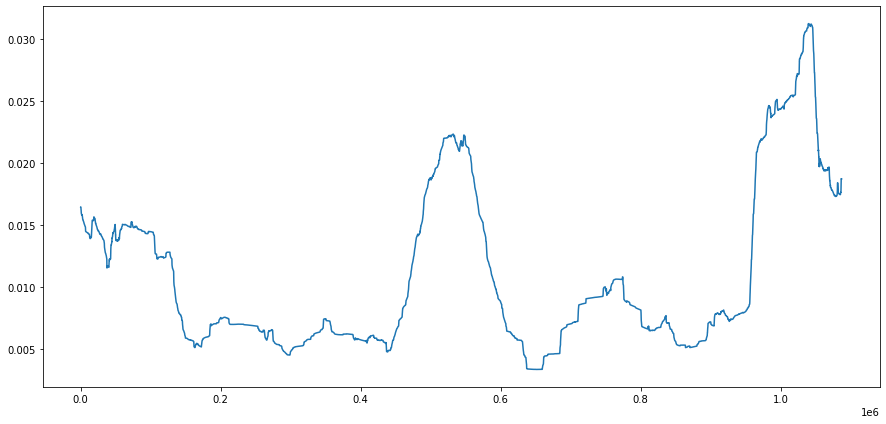

4
leg


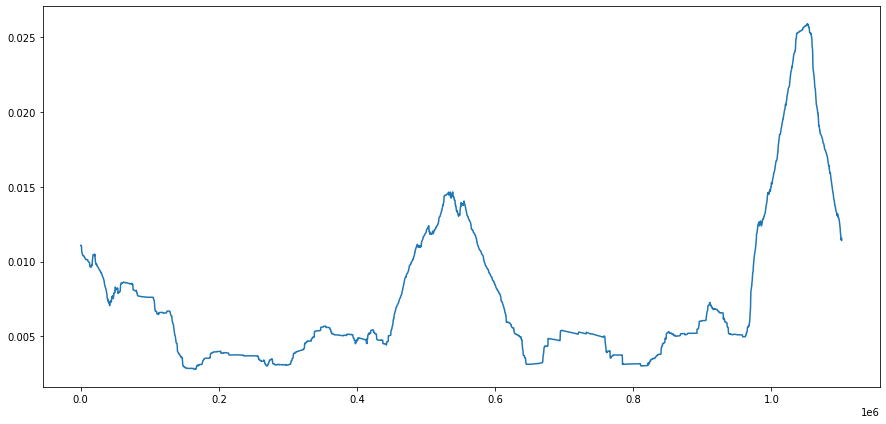

In [5]:
plt.ion()
matplotlib.rcParams['figure.figsize'] = [15, 7]
class_value_list = list()
limb_list = list()

limb_dict = {"arm": 1, "leg": 2}

for meas_name, meas in mc.measurement_dict.items():
    if meas.valid:
        for key in meas.measurement_dict.keys():
            if key[2] == "acc":
                mean_list = meas.sweep_diff(key, length=25 * 60 * 60, mean=True)
                    
                print(meas.get_class_value(key[:2]))
                print(key[1])
                plt.plot(mean_list)
                plt.show()

812268
812268
1202mimo


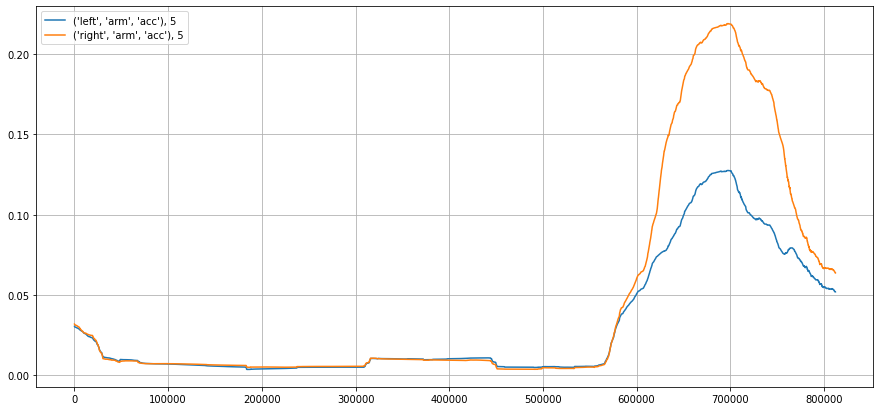

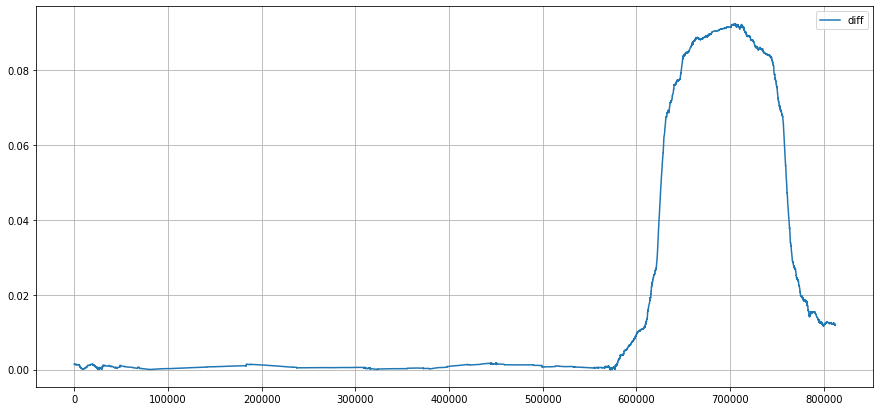

812268
812268
1202mimo


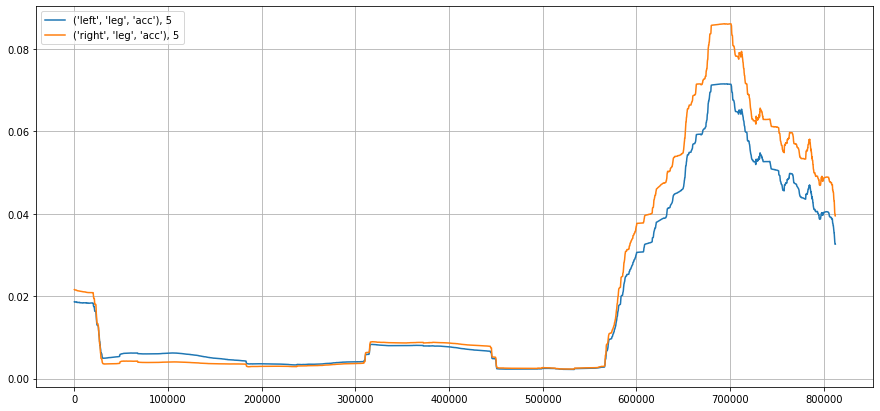

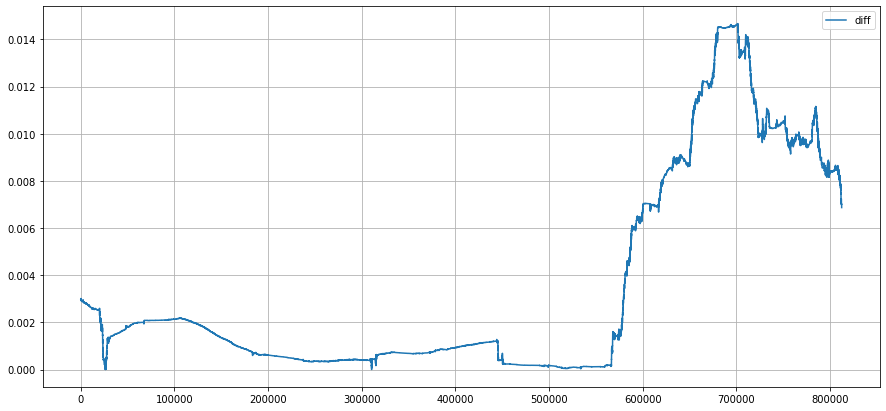

812269
812269
1202mimo


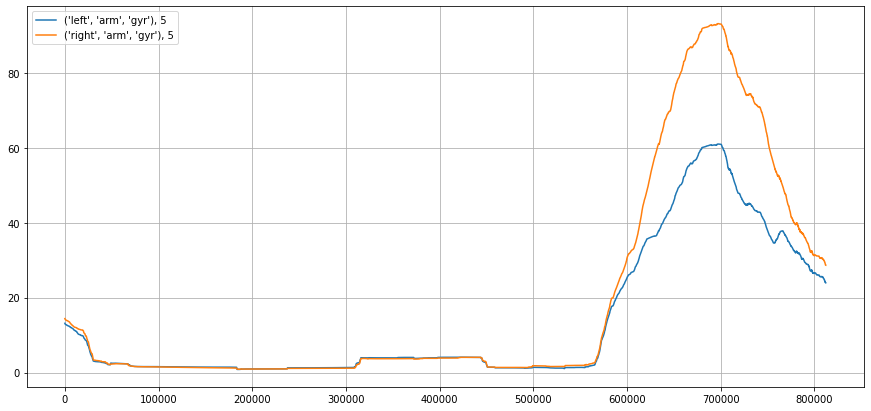

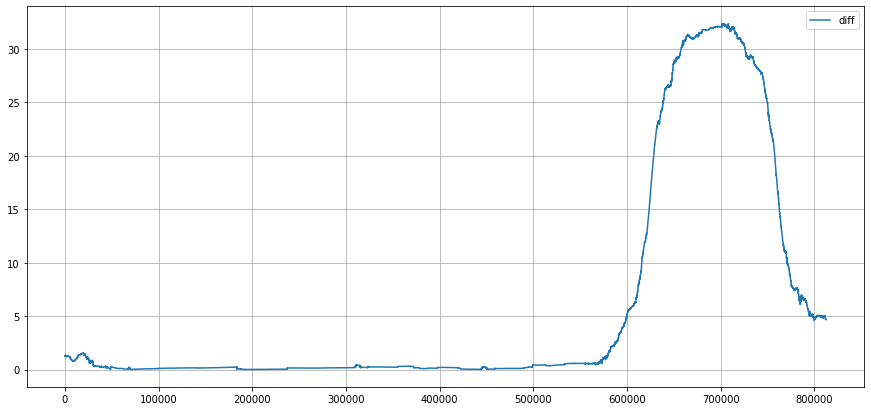

812269
812269
1202mimo


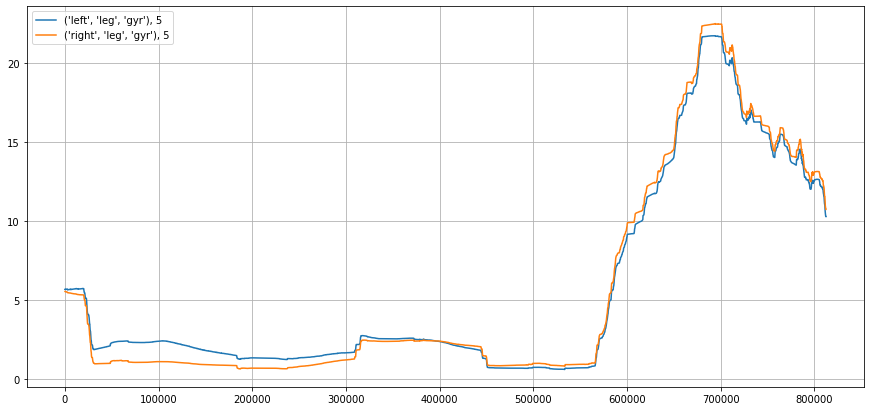

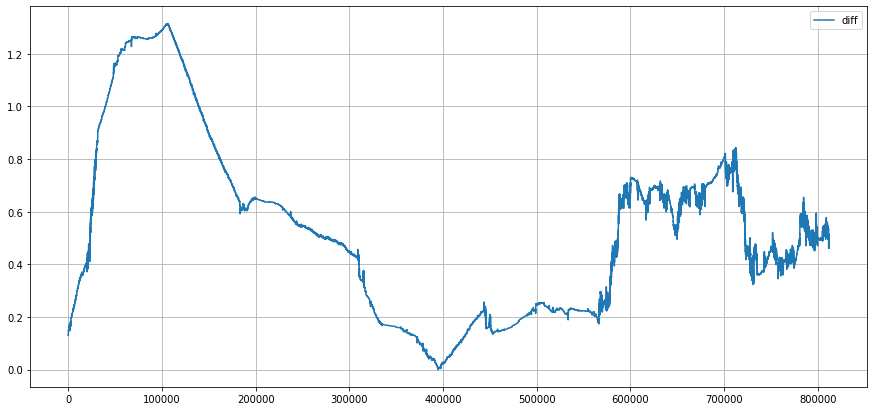

In [3]:
plt.ion()
matplotlib.rcParams['figure.figsize'] = [15, 7]

limb_dict = {"arm": 1, "leg": 2}
l_r_diff_list = list()
l_r_key_cv_list = list()

for meas_name, key, class_value, diff_list in mc.sweep_diff_generator(length=25 * 60 * 90, mean=True):
    print(len(diff_list))
    l_r_diff_list.append(np.array(diff_list))
    l_r_key_cv_list.append((key, class_value))
    if len(l_r_diff_list) == 2:
        print(meas_name)
        plt.plot(l_r_diff_list[0], label='{}, {}'.format(*l_r_key_cv_list[0]))
        plt.plot(l_r_diff_list[1], label='{}, {}'.format(*l_r_key_cv_list[1]))
        plt.legend(loc='best')
        plt.grid()
        plt.show()
        plt.plot(np.abs(l_r_diff_list[1] - l_r_diff_list[0]), label='diff')
        plt.legend(loc='best')
        plt.grid()
        plt.show()
        l_r_diff_list = list()
        l_r_key_cv_list = list()

In [12]:
#1118koroknay
for key, meas_df in mc.get_measurement_df(202201310, only_valid=True).items():
    #display(meas_df.head())
    #continue
    if key[2] == "acc":
        meas_df.plot(x="epoch", y=["x-axis", "y-axis", "z-axis"], grid=True,
                     label=["{} {} {}".format(*key)] * 3, subplots=True, layout=(3, 1))
    else:
        meas_df.plot(x="epoch", y=["x-axis", "y-axis", "z-axis"], grid=True,
                     label=["{} {} {}".format(*key)] * 3, subplots=True, layout=(3, 1))

False True
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
zero length of data 202201310, ('left', 'arm', 'acc')
zero length of data 202201310, ('left', 'arm', 'gyr')
zero length of data 202201310, ('left', 'leg', 'acc')
zero length of data 202201310, ('left', 'leg', 'gyr')
zero length of data 202201310, ('right', 'arm', 'acc')
zero length of data 202201310, ('right', 'arm', 'gyr')
zero length of data 202201310, ('right', 'leg', 'acc')
zero length of data 202201310, ('right', 'leg', 'gyr')
202201310
('left', 'arm', 'acc')


NameError: name 'exit' is not defined

In [3]:
_1118koroknay = mc.get_measurement_df("1118koroknay")

('left', 'arm', 'gyr')
['epoch', 'x-axis', 'y-axis', 'z-axis']

('left', 'leg', 'acc')
['epoch', 'x-axis', 'y-axis', 'z-axis']

('left', 'leg', 'gyr')
['epoch', 'x-axis', 'y-axis', 'z-axis']

('right', 'arm', 'acc')
['epoch', 'x-axis', 'y-axis', 'z-axis']

('right', 'arm', 'gyr')
['epoch', 'x-axis', 'y-axis', 'z-axis']

('right', 'leg', 'acc')
['epoch', 'x-axis', 'y-axis', 'z-axis']

('right', 'leg', 'gyr')
['epoch', 'x-axis', 'y-axis', 'z-axis']



In [5]:
for key, meas_df in _1118koroknay.items():
    display(len(meas_df))
    display(meas_df.head())

1315701

,epoch (ms),x-axis (g),y-axis (g),z-axis (g)
17607,1637251190020,1.002,-0.055,0.072
17608,1637251190060,1.000,-0.056,0.073
17609,1637251190101,1.001,-0.055,0.074
17610,1637251190141,1.000,-0.056,0.074
17611,1637251190180,1.002,-0.054,0.072


1315701

,epoch (ms),x-axis (g),y-axis (g),z-axis (g)
0,1637251190020,1.002,-0.055,0.072
1,1637251190060,1.000,-0.056,0.073
2,1637251190101,1.001,-0.055,0.074
3,1637251190141,1.000,-0.056,0.074
4,1637251190180,1.002,-0.054,0.072


1315701

,epoch (ms),x-axis (g),y-axis (g),z-axis (g)
0,1637251190020,1.002,-0.055,0.072
1,1637251190060,1.000,-0.056,0.073
2,1637251190101,1.001,-0.055,0.074
3,1637251190141,1.000,-0.056,0.074
4,1637251190180,1.002,-0.054,0.072


1315701

,epoch (ms),x-axis (g),y-axis (g),z-axis (g)
0,1637251190020,1.002,-0.055,0.072
1,1637251190060,1.000,-0.056,0.073
2,1637251190101,1.001,-0.055,0.074
3,1637251190141,1.000,-0.056,0.074
4,1637251190180,1.002,-0.054,0.072


1315701

,epoch (ms),x-axis (g),y-axis (g),z-axis (g)
0,1637251190020,1.002,-0.055,0.072
1,1637251190060,1.000,-0.056,0.073
2,1637251190101,1.001,-0.055,0.074
3,1637251190141,1.000,-0.056,0.074
4,1637251190180,1.002,-0.054,0.072


1315701

,epoch (ms),x-axis (g),y-axis (g),z-axis (g)
0,1637251190020,1.002,-0.055,0.072
1,1637251190060,1.000,-0.056,0.073
2,1637251190101,1.001,-0.055,0.074
3,1637251190141,1.000,-0.056,0.074
4,1637251190180,1.002,-0.054,0.072


1315701

,epoch (ms),x-axis (g),y-axis (g),z-axis (g)
0,1637251190020,1.002,-0.055,0.072
1,1637251190060,1.000,-0.056,0.073
2,1637251190101,1.001,-0.055,0.074
3,1637251190141,1.000,-0.056,0.074
4,1637251190180,1.002,-0.054,0.072


1315701

,epoch (ms),x-axis (g),y-axis (g),z-axis (g)
0,1637251190020,1.002,-0.055,0.072
1,1637251190060,1.000,-0.056,0.073
2,1637251190101,1.001,-0.055,0.074
3,1637251190141,1.000,-0.056,0.074
4,1637251190180,1.002,-0.054,0.072


In [16]:
merged_df = pd.merge_asof(_1118koroknay[("left", "arm", "acc")], _1118koroknay[("right", "arm", "acc")],
                          on="epoch (ms)", tolerance=40)
display(_1118koroknay[("left", "arm", "acc")].head(10))
display(_1118koroknay[("right", "arm", "acc")].head(10))
display(merged_df.head(10))

,epoch (ms),time (01:00),elapsed (s),x-axis (g),y-axis (g),z-axis (g)
17607,1637251190020,2021-11-18T16:59:50.020,704.961,1.002,-0.055,0.072
17608,1637251190060,2021-11-18T16:59:50.060,705.001,1.000,-0.056,0.073
17609,1637251190101,2021-11-18T16:59:50.101,705.042,1.001,-0.055,0.074
17610,1637251190141,2021-11-18T16:59:50.141,705.082,1.000,-0.056,0.074
17611,1637251190180,2021-11-18T16:59:50.180,705.121,1.002,-0.054,0.072
17612,1637251190221,2021-11-18T16:59:50.221,705.162,1.000,-0.054,0.075
17613,1637251190261,2021-11-18T16:59:50.261,705.202,1.000,-0.055,0.074
17614,1637251190300,2021-11-18T16:59:50.300,705.241,1.002,-0.055,0.072
17615,1637251190341,2021-11-18T16:59:50.341,705.282,1.002,-0.054,0.073
17616,1637251190381,2021-11-18T16:59:50.381,705.322,1.002,-0.054,0.075


,epoch (ms),time (01:00),elapsed (s),x-axis (g),y-axis (g),z-axis (g)
16331,1637251190013,2021-11-18T16:59:50.013,651.670,0.667,-0.514,0.583
16332,1637251190052,2021-11-18T16:59:50.052,651.709,0.666,-0.516,0.583
16333,1637251190092,2021-11-18T16:59:50.092,651.749,0.669,-0.518,0.583
16334,1637251190131,2021-11-18T16:59:50.131,651.788,0.673,-0.510,0.583
16335,1637251190171,2021-11-18T16:59:50.171,651.828,0.666,-0.513,0.585
16336,1637251190212,2021-11-18T16:59:50.212,651.869,0.664,-0.515,0.584
16337,1637251190251,2021-11-18T16:59:50.251,651.908,0.667,-0.514,0.584
16338,1637251190291,2021-11-18T16:59:50.291,651.948,0.668,-0.515,0.582
16339,1637251190331,2021-11-18T16:59:50.331,651.988,0.667,-0.514,0.583
16340,1637251190372,2021-11-18T16:59:50.372,652.029,0.665,-0.514,0.583


,epoch (ms),time (01:00)_x,elapsed (s)_x,x-axis (g)_x,y-axis (g)_x,z-axis (g)_x,time (01:00)_y,elapsed (s)_y,x-axis (g)_y,y-axis (g)_y,z-axis (g)_y
0,1637251190020,2021-11-18T16:59:50.020,704.961,1.002,-0.055,0.072,2021-11-18T16:59:50.013,651.670,0.667,-0.514,0.583
1,1637251190060,2021-11-18T16:59:50.060,705.001,1.000,-0.056,0.073,2021-11-18T16:59:50.052,651.709,0.666,-0.516,0.583
2,1637251190101,2021-11-18T16:59:50.101,705.042,1.001,-0.055,0.074,2021-11-18T16:59:50.092,651.749,0.669,-0.518,0.583
3,1637251190141,2021-11-18T16:59:50.141,705.082,1.000,-0.056,0.074,2021-11-18T16:59:50.131,651.788,0.673,-0.510,0.583
4,1637251190180,2021-11-18T16:59:50.180,705.121,1.002,-0.054,0.072,2021-11-18T16:59:50.171,651.828,0.666,-0.513,0.585
5,1637251190221,2021-11-18T16:59:50.221,705.162,1.000,-0.054,0.075,2021-11-18T16:59:50.212,651.869,0.664,-0.515,0.584
6,1637251190261,2021-11-18T16:59:50.261,705.202,1.000,-0.055,0.074,2021-11-18T16:59:50.251,651.908,0.667,-0.514,0.584
7,1637251190300,2021-11-18T16:59:50.300,705.241,1.002,-0.055,0.072,2021-11-18T16:59:50.291,651.948,0.668,-0.515,0.582
8,1637251190341,2021-11-18T16:59:50.341,705.282,1.002,-0.054,0.073,2021-11-18T16:59:50.331,651.988,0.667,-0.514,0.583
9,1637251190381,2021-11-18T16:59:50.381,705.322,1.002,-0.054,0.075,2021-11-18T16:59:50.372,652.029,0.665,-0.514,0.583


In [24]:
pd.merge_asof(_1118koroknay[("left", "arm", "acc")], _1118koroknay[("right", "arm", "acc")],
                          on="epoch (ms)", tolerance=50).isna().sum().sum()

0

In [25]:
len(merged_df)

1315701

In [26]:
len(_1118koroknay[("left", "arm", "acc")])

1315701

In [27]:
len(_1118koroknay[("right", "arm", "acc")])

1320199

array([[<AxesSubplot:xlabel='epoch (ms)'>],
       [<AxesSubplot:xlabel='epoch (ms)'>],
       [<AxesSubplot:xlabel='epoch (ms)'>]], dtype=object)

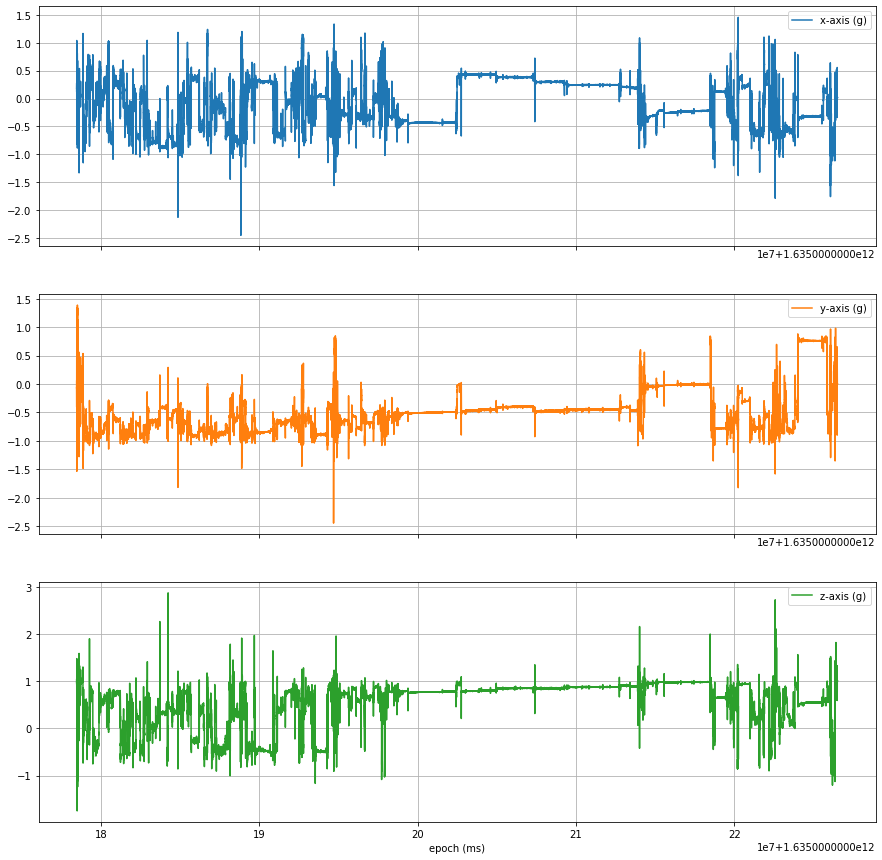

In [28]:
jenei_b_k_a.plot(x="epoch (ms)", y=["x-axis (g)", "y-axis (g)", "z-axis (g)"], grid=True, subplots=True, layout=(3, 1))

array([[<AxesSubplot:xlabel='epoch (ms)'>],
       [<AxesSubplot:xlabel='epoch (ms)'>],
       [<AxesSubplot:xlabel='epoch (ms)'>]], dtype=object)

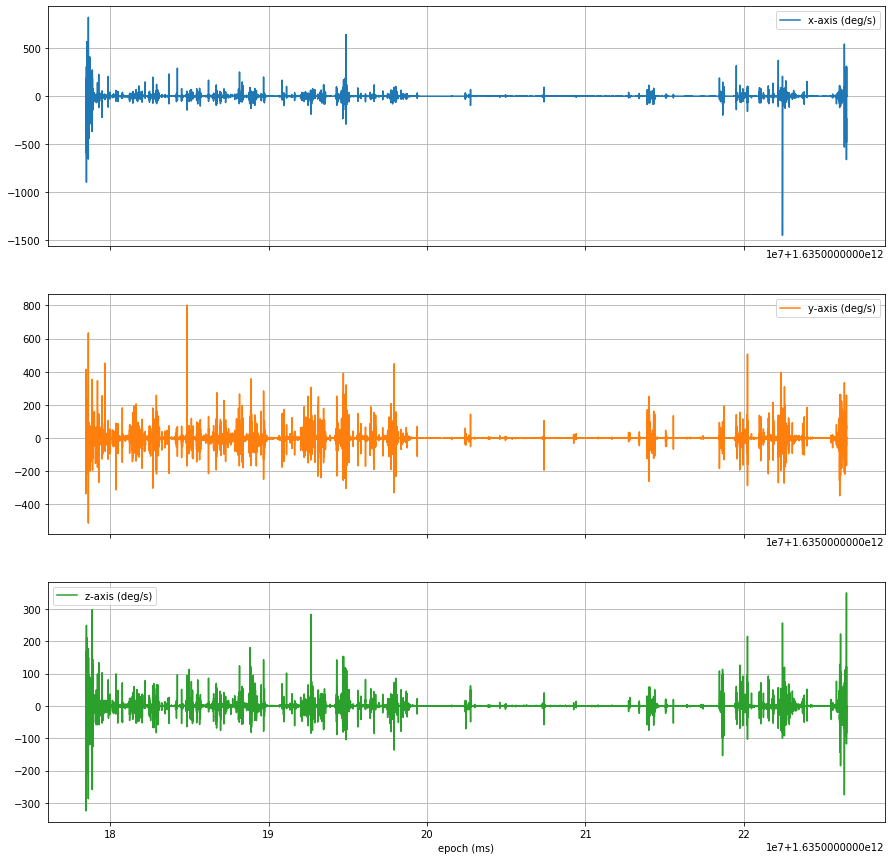

In [29]:
jenei_b_k_g.plot(x="epoch (ms)", y=["x-axis (deg/s)", "y-axis (deg/s)", "z-axis (deg/s)"], grid=True, subplots=True, layout=(3, 1))

## Limb Acc Diff

In [4]:
mean_list = list()
class_value_list = list()
limb_list = list()

limb_dict = {"arm": 1, "leg": 2}

for meas_name, meas in mc.measurement_dict.items():
    if meas.valid:
        for limb in limb_dict.keys():
            result_diff, is_five = meas.get_limb_acc_diff_mean(limb)
            if is_five:
                mean_list.append(result_diff)
                class_value_list.append(meas.get_limb_class_value(limb))
                limb_list.append(limb_dict[limb])

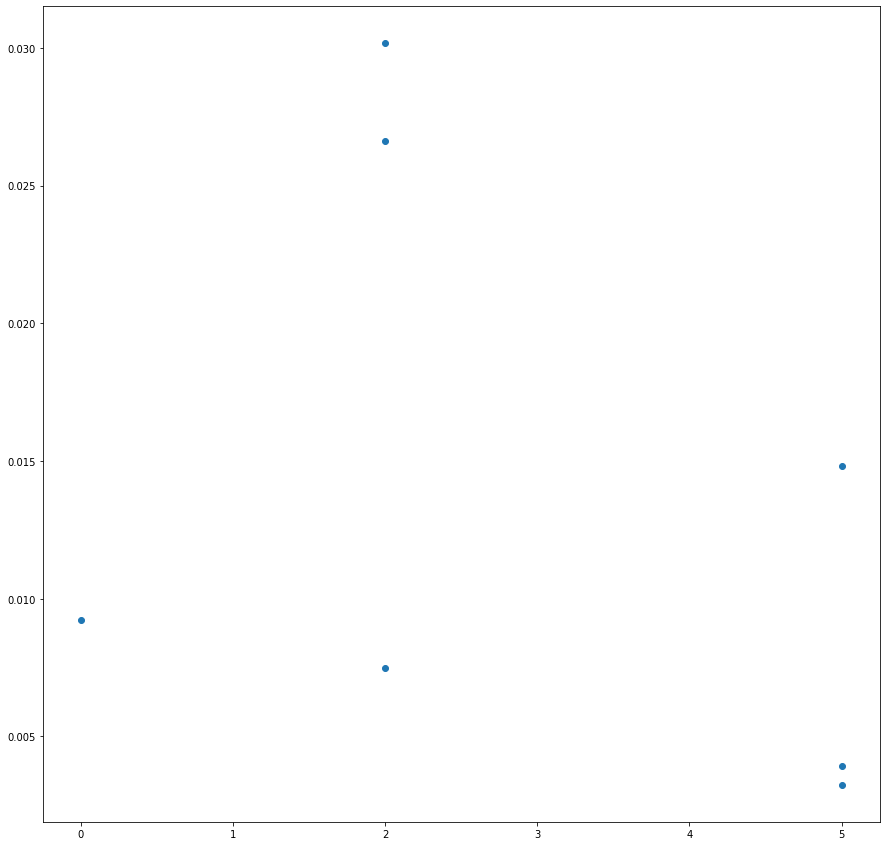

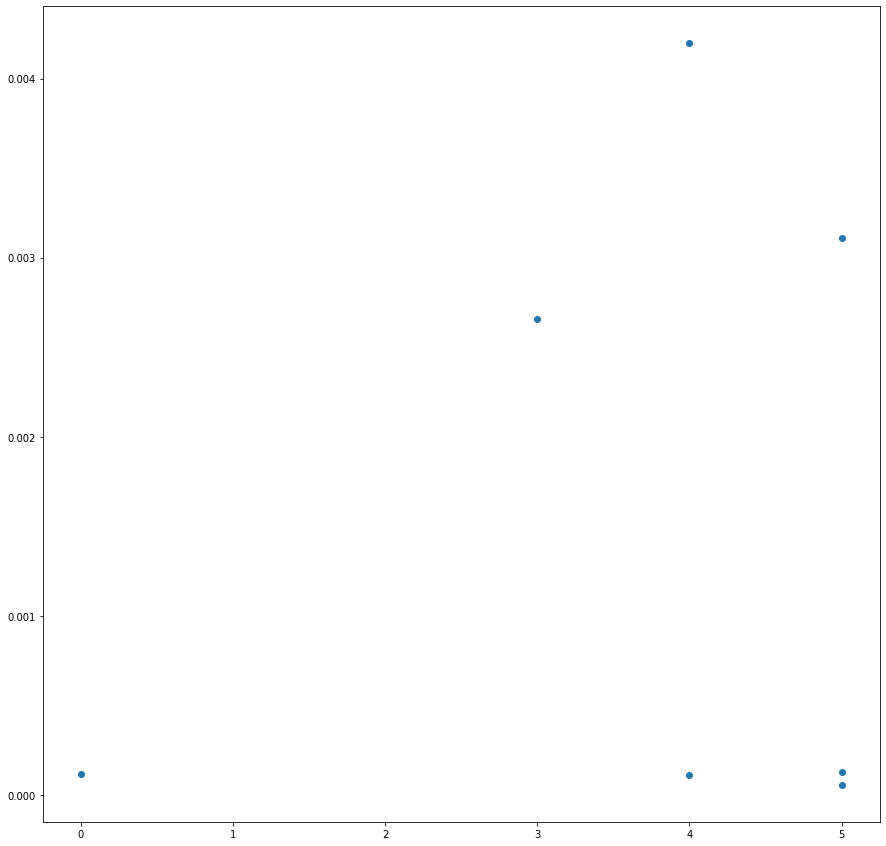

In [6]:
for limb_idx in range(1, 3):
    plt.scatter([class_value_list[i] for i in range(len(limb_list)) if limb_list[i] == limb_idx],
                [mean_list[i] for i in range(len(limb_list)) if limb_list[i] == limb_idx])
    plt.show()